## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

In [1]:
import json

with open('hw4_data.json', 'r') as f:
    data = json.load(f)

adjacency_dict = {}

nodes = data['nodes']
for node in nodes:
    user, influence = node
    adjacency_dict[user] = {}

edges = data['edges']
for edge in edges:
    user1, user2, weight = edge
    adjacency_dict[user1][user2] = weight
    adjacency_dict[user2][user1] = weight  # 假设无向图，双向边

print("邻接字典：")
for user, connections in adjacency_dict.items():
    print(f"{user}: {connections}")


邻接字典：
Yanyan-Wang: {'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}
Aarebecca: {'Yanyan-Wang': 25.3, 'pomelo-nwu': 24.84, 'yangzy0603': 11.92, 'yvonneyx': 7.73, 'lidongze0629': 6.58, 'tyn1998': 6.4, 'RackweLLizm': 4.84, 'yikenie': 4.55, 'yubo0923': 3.82, 'Maple0817': 3.27, 'frank-zsy': 0.97}
pomelo-nwu: {'Yanyan-Wang': 25.09, 'Aarebecca': 24.84, 'yangzy0603': 13.85, 'tyn1998': 12.48, 'lidongze0629': 8.1, 'yvonneyx': 7.63, 'RackweLLizm': 4.97, 'yikenie': 4.66, 'bifenglin': 4.11, 'frank-zsy': 3.96, 'yubo0923': 3.9, 'wj23027': 3.86, 'andyhuang18': 3.56, 'Maple0817': 3.32, 'will-ww': 3.27, 'zhicheng-ning': 2.52, 'PureNatural': 2.36, 'xiaoya-yaya': 2.24, 'xgdyp': 2.1, 'longyanz': 2.1, 'Zzzzzhuzhiwei': 1.5, 'birdflyi': 1.33, 'lhbvvvvv': 1.09, 'zhaosj975': 1}
tyn1998: {'andyhua

In [4]:
direct_friends = {}

for user, connections in adjacency_dict.items():
    # 提取该用户的直接朋友（即邻接节点）
    friends = list(connections.keys())
    direct_friends[user] = friends

print("每个用户的直接朋友：")
for user, friends in direct_friends.items():
    print(f"{user}: {friends}")


每个用户的直接朋友：
Yanyan-Wang: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
tyn1998: ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0629', 'yvonneyx', 'stea

2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

In [6]:
user_degrees = {user: len(friends) for user, friends in direct_friends.items()}

top_5_users = sorted(user_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

print("度数最多的前5个用户及其朋友数量：")
for user, degree in top_5_users:
    print(f"{user}: {degree} 朋友")


度数最多的前5个用户及其朋友数量：
tyn1998: 30 朋友
frank-zsy: 30 朋友
pomelo-nwu: 24 朋友
andyhuang18: 23 朋友
wj23027: 23 朋友


In [7]:
top_5_influential_users = sorted(nodes, key=lambda x: x[1], reverse=True)[:5]

print("影响力最高的前5个用户及其影响力分数：")
for user, influence in top_5_influential_users:
    print(f"{user}: {influence} 影响力分数")


影响力最高的前5个用户及其影响力分数：
Yanyan-Wang: 50.95 影响力分数
Aarebecca: 23.82 影响力分数
pomelo-nwu: 22.36 影响力分数
tyn1998: 16.64 影响力分数
frank-zsy: 15.8 影响力分数


In [8]:
influence_weight = 0.5  
friend_count_weight = 0.5  

influence_dict = {user: influence for user, influence in nodes}
user_scores = {}
for user in user_degrees:
    influence_score = influence_dict.get(user, 0)
    friend_count = user_degrees.get(user, 0)
    
    weighted_score = (influence_score * influence_weight) + (friend_count * friend_count_weight)
    user_scores[user] = weighted_score

top_users_by_influence = sorted(user_scores.items(), key=lambda x: x[1], reverse=True)

print("综合考虑影响力分数和朋友数量的最有影响力的用户：")
for user, score in top_users_by_influence[:5]:  # 取前5个用户
    print(f"{user}: {score} 综合得分")


综合考虑影响力分数和朋友数量的最有影响力的用户：
Yanyan-Wang: 32.475 综合得分
tyn1998: 23.32 综合得分
pomelo-nwu: 23.18 综合得分
frank-zsy: 22.9 综合得分
Aarebecca: 17.41 综合得分


3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 

In [9]:
direct_friends = adjacency_dict["Yanyan-Wang"]

potential_new_friends = {}

for friend in direct_friends:
    friends_of_friend = adjacency_dict.get(friend, {})
    
    for fof in friends_of_friend:
        if fof != "Yanyan-Wang" and fof not in direct_friends:
            if fof not in potential_new_friends:
                potential_new_friends[fof] = 0
            potential_new_friends[fof] += 1

recommended_friends = sorted(potential_new_friends.items(), key=lambda x: x[1], reverse=True)

print("推荐给 Yanyan-Wang 的潜在新朋友及理由：")
for user, common_friends_count in recommended_friends[:5]:
    print(f"{user}: 有 {common_friends_count} 个共同朋友")


推荐给 Yanyan-Wang 的潜在新朋友及理由：
will-ww: 有 6 个共同朋友
zhicheng-ning: 有 6 个共同朋友
PureNatural: 有 6 个共同朋友
xiaoya-yaya: 有 6 个共同朋友
xgdyp: 有 6 个共同朋友


In [10]:
connection_strengths = {}

for edge in data['edges']:
    user1, user2, weight = edge
    if user1 == "Yanyan-Wang":
        connection_strengths[user2] = weight
    elif user2 == "Yanyan-Wang":
        connection_strengths[user1] = weight

recommended_by_strength = sorted(connection_strengths.items(), key=lambda x: x[1], reverse=True)

print("与 Yanyan-Wang 连接强度最高的5个用户：")
for user, strength in recommended_by_strength[:5]:
    print(f"{user}: 连接强度 {strength}")


与 Yanyan-Wang 连接强度最高的5个用户：
Aarebecca: 连接强度 25.3
pomelo-nwu: 连接强度 25.09
yangzy0603: 连接强度 11.85
tyn1998: 连接强度 9.62
yvonneyx: 连接强度 7.39


4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

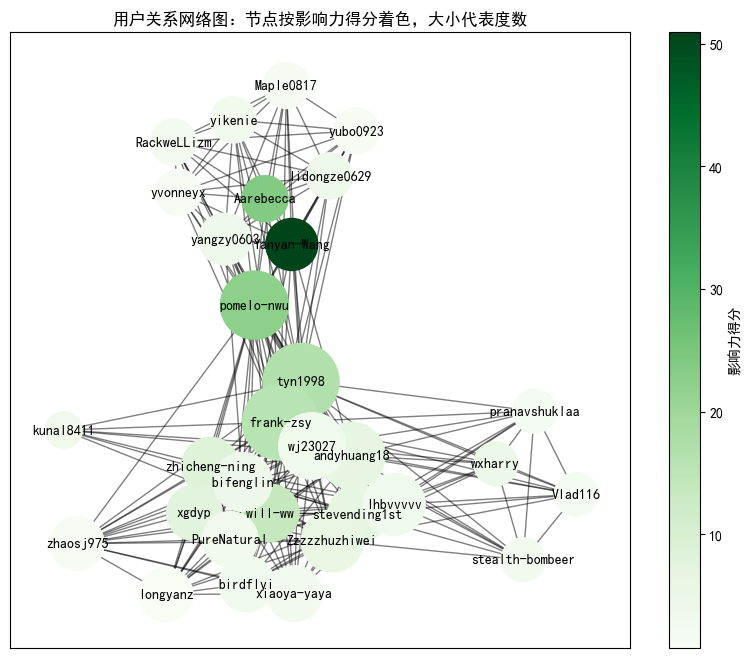

In [21]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置字体为支持中文的字体，如 SimHei 或 Microsoft YaHei
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

# 读取 JSON 文件
with open('hw4_data.json', 'r') as f:
    data = json.load(f)

# 初始化图
G = nx.Graph()

# 添加用户节点，用户信息存储在 "nodes" 中
for user, influence in data['nodes']:
    G.add_node(user, influence=influence)

# 添加边，边信息存储在 "edges" 中
for edge in data['edges']:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)

# 构建邻接字典，用于计算每个用户的度数（朋友数量）
adjacency_dict = {user: {} for user, _ in data['nodes']}
for edge in data['edges']:
    user1, user2, weight = edge
    adjacency_dict[user1][user2] = weight
    adjacency_dict[user2][user1] = weight

# 设置节点颜色为影响力分数，节点大小为度数（朋友数量）
node_colors = [G.nodes[user]['influence'] for user in G.nodes()]
node_sizes = [len(adjacency_dict[user]) * 100 for user in G.nodes()]

# 可视化用户关系网络
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

# 绘制节点，按影响力得分着色
node_collection = nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, cmap=plt.cm.Greens)

# 绘制边
nx.draw_networkx_edges(G, pos, alpha=0.5)

# 绘制节点标签
nx.draw_networkx_labels(G, pos, font_size=10)

# 添加颜色条，表示影响力得分
plt.colorbar(node_collection, label="影响力得分")

# 显示图形
plt.title("用户关系网络图：节点按影响力得分着色，大小代表度数")
plt.show()
